# <font color='red'>Bike Sharing Assignment</font>

### Problem Statement
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same.

### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

##### We need to answer two questions for the company:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands


### Sequence:
* Reading the data set and conduct EDA
* Preparing the data (train-test split, rescaling etc)
* Training the model
* Residual analysis of the Model
* Predictions and evaluation on the test set
* Residual analysis on test

### Import Required Libaries

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import sklearn

In [61]:
inp = pd.read_csv('day.csv')
inp.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [62]:
inp['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [63]:
## check the datatypes
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [64]:
## describe the dataframe 
inp.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [65]:
## convert Date object into pandas datetime
inp['dteday'] = pd.to_datetime(inp['dteday'])

In [66]:
## check the missing values
inp.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- No missing values in the dataset

### EDA

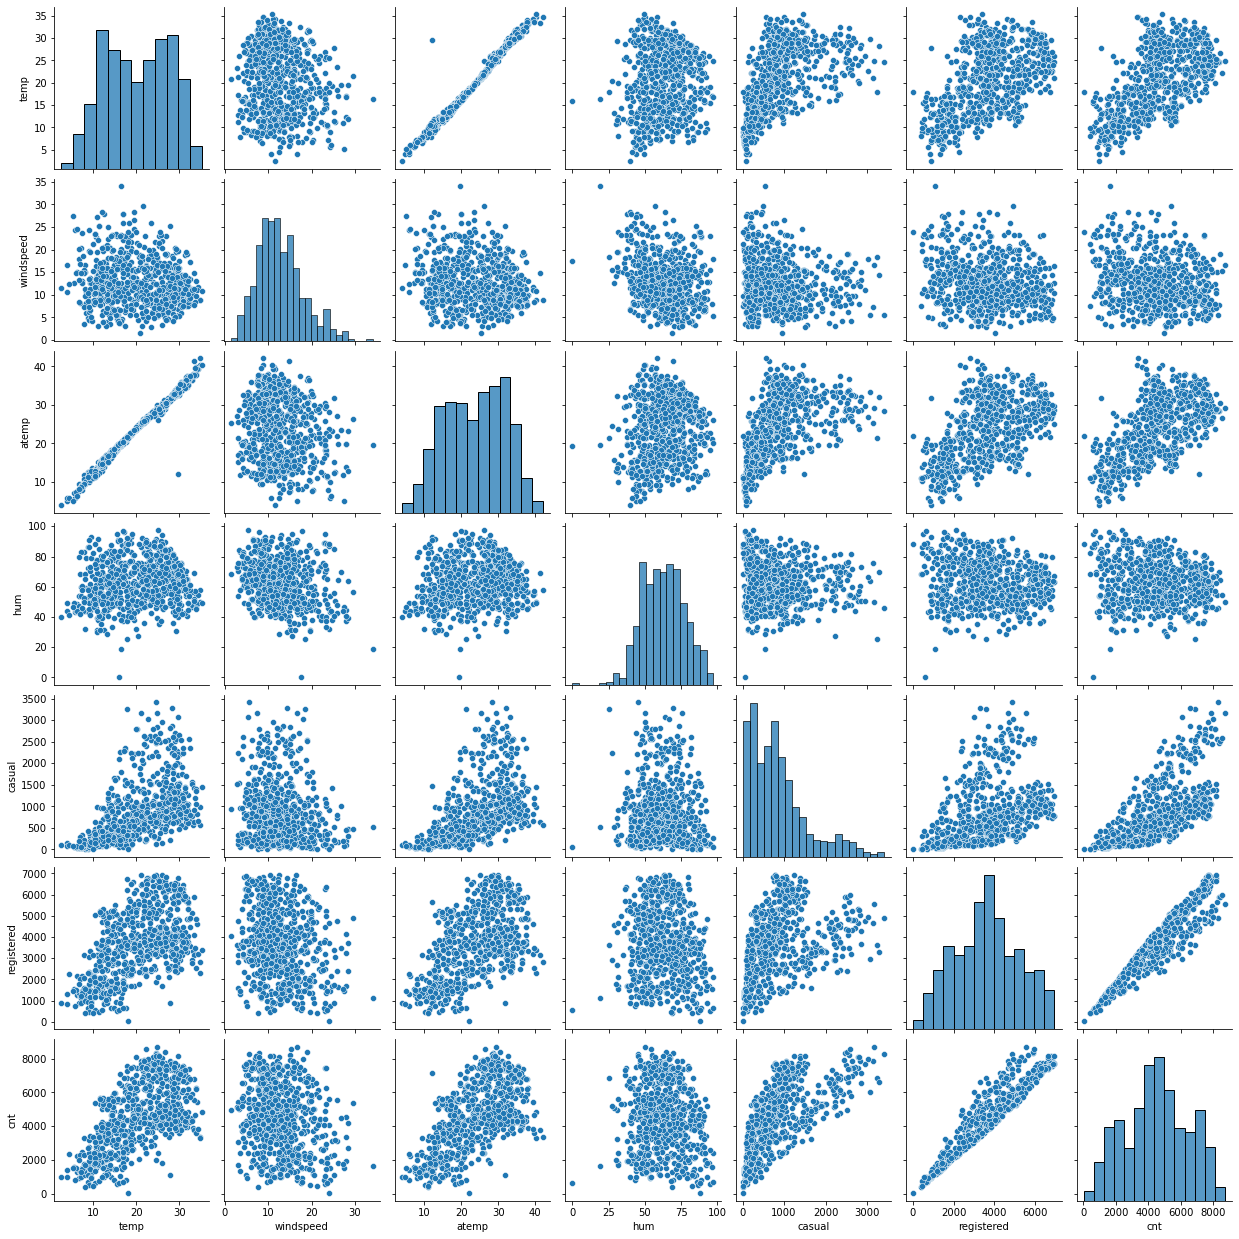

In [67]:
## lets take temperatue, casual, registered count values 
sns.pairplot(inp[['temp','windspeed','atemp','hum','casual','registered','cnt']])
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\Arvind\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

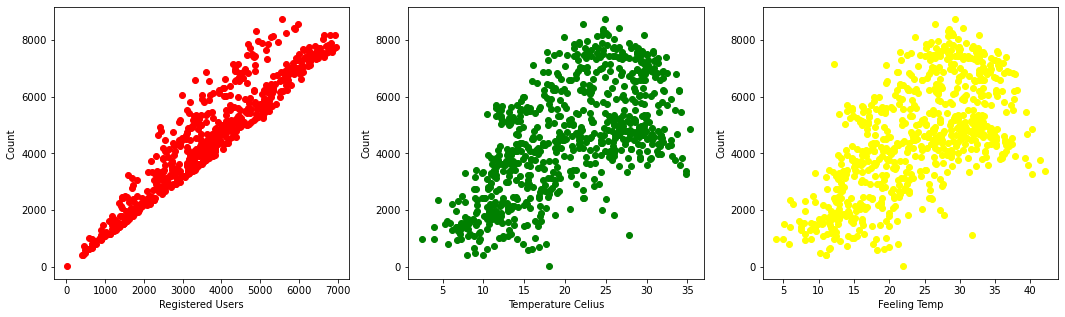

In [68]:
## create the subplots to check the positive corelations
plt.figure(figsize=[18,5])
plt.subplot(1,3,1)
plt.scatter(y='cnt',x='registered',data=inp, color='red')
plt.ylabel('Count ')
plt.xlabel('Registered Users')

plt.subplot(1,3,2)
plt.scatter(y='cnt', x='temp',data=inp, color='green')
plt.xlabel('Temperature Celius')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.scatter(y='cnt', x='atemp',data=inp, color='yellow')
plt.xlabel('Feeling Temp')
plt.ylabel('Count')
plt

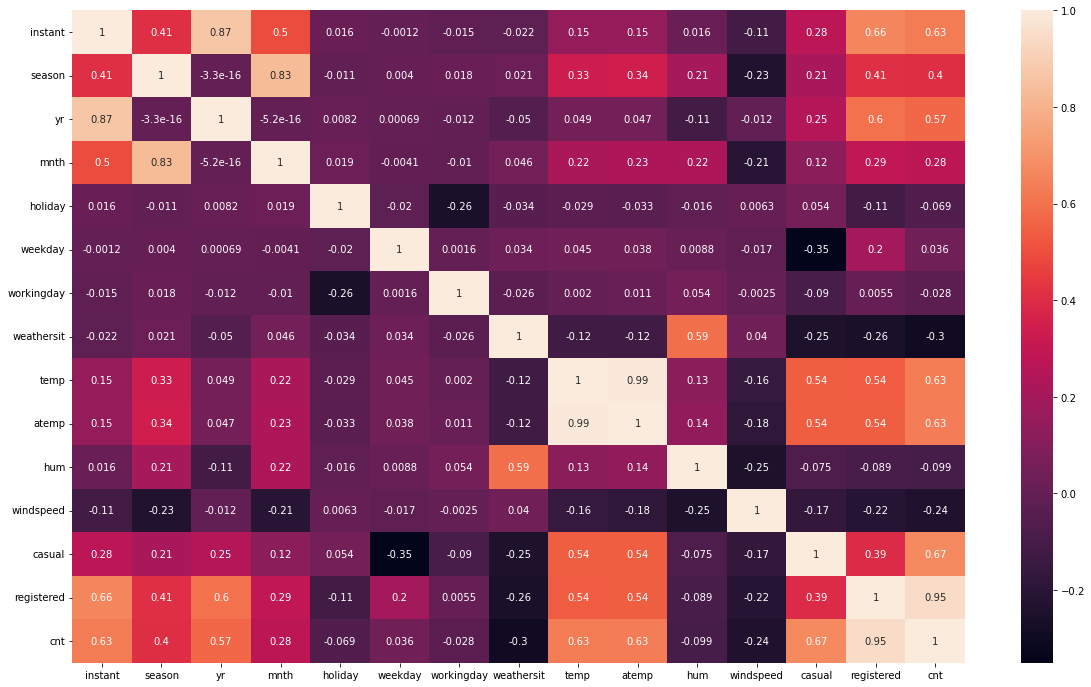

In [69]:
## let check the correlation 

plt.figure(figsize=[20,12])
sns.heatmap(inp.corr(),annot=True)
plt.show()

- we are getting high correlated value in the count of Casual 0.67, Registered 0.95
- low correlated value in the count of humidity -0.099, holiday -0.069, workingday -0.028

In [70]:
## rename the columns 
inp.rename(columns={'dteday':'Date','atemp':'Feel_Temp','hum':'humidity','yr':'Year','mnth':'Month'},inplace=True)
inp.head()

,instant,Date,season,Year,Month,holiday,weekday,workingday,weathersit,temp,Feel_Temp,humidity,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Convert Numerical into Categorical

<AxesSubplot:xlabel='season', ylabel='cnt'>

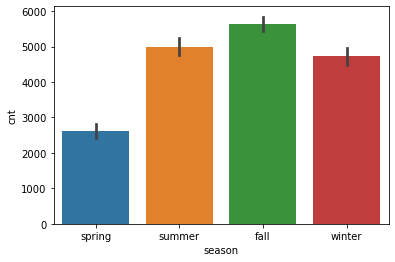

In [71]:
## change the season into categorical 
def binary(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})
inp[['season']] = inp[['season']].apply(binary)

## plot the season
sns.barplot(x='season', y='cnt',data=inp)

- High Bike Rental was in the season Fall and spring season bike rental was not good

<AxesSubplot:xlabel='Month', ylabel='cnt'>

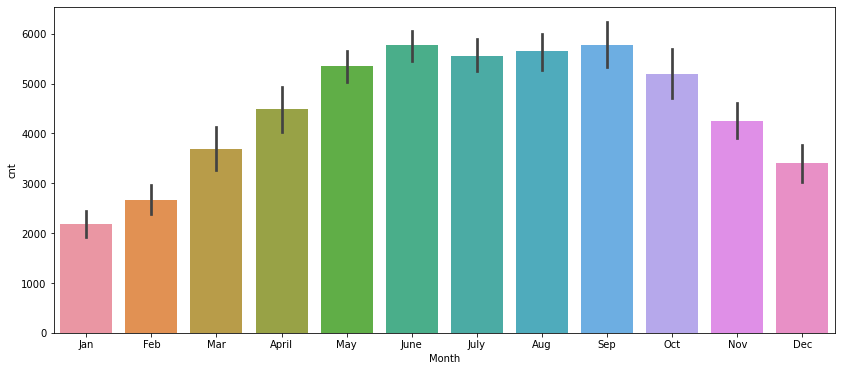

In [72]:
def binary(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',
                  8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
inp[['Month']] = inp[['Month']].apply(binary)

# plot the month to check the count 
plt.figure(figsize=(14,6))
sns.barplot(x='Month', y='cnt', data=inp)

 - Good bike Rental was in the Middle of month 

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

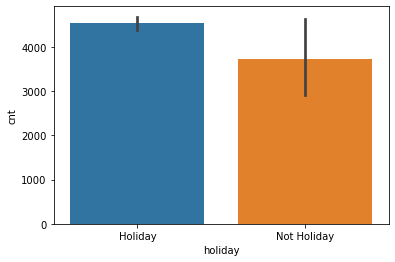

In [73]:
inp[['holiday']] = inp[['holiday']].apply(lambda x: x.map({0:'Holiday',1:'Not Holiday'}))

sns.barplot(x='holiday', y='cnt', data=inp)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

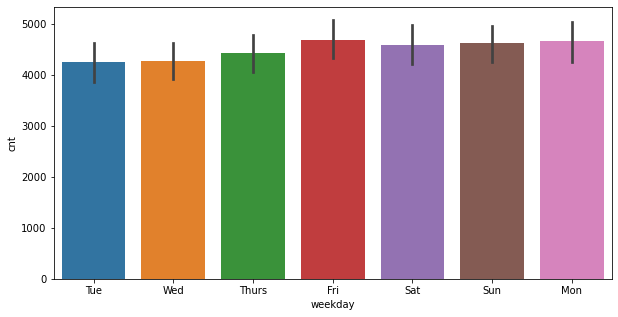

In [74]:
## convert the weeks into numeric to categorical to check weekdays count

def binary(x):
    return x.map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})

inp[['weekday']] = inp[['weekday']].apply(binary)

## weekdays count visualize
plt.figure(figsize=(10,5))
sns.barplot(x='weekday', y='cnt', data=inp)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

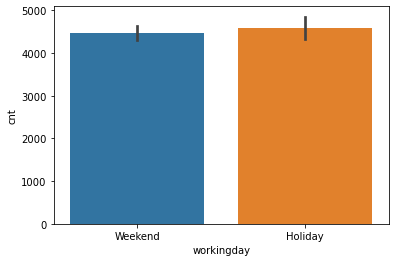

In [75]:
inp[['workingday']] = inp[['workingday']].apply(lambda x: x.map({0:'Holiday', 1:'Weekend'}))

sns.barplot(x='workingday', y='cnt', data=inp)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

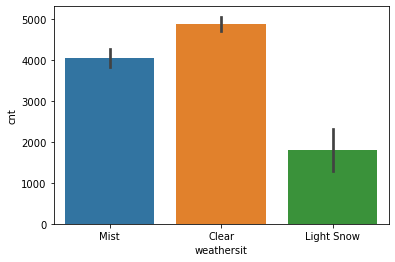

In [76]:
def binary(x):
    return x.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

inp[['weathersit']] = inp[['weathersit']].apply(binary)

## plot weather and there count
sns.barplot(x='weathersit', y='cnt', data=inp)

<AxesSubplot:xlabel='Year', ylabel='cnt'>

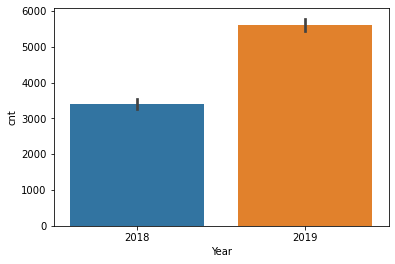

In [77]:
year = {0:2018,1:2019}
inp['Year'] = inp['Year'].map(year)

# plot the year count
sns.barplot(x='Year', y='cnt', data=inp)

- Comparing the Two years Good bike Rental was in the year 2019 

In [78]:
## convert year into 0 and 1 for model building process
year = {2018:0,2019:1}
inp['Year'] = inp['Year'].map(year)

### Dummy Coding

In [79]:
## create dummy variable for the categorical variable
var = inp[['season','Month','workingday','weekday','weathersit']]
status = pd.get_dummies(var, drop_first=True)

## concat the dummy variable for the master dataset
inp = pd.concat([inp,status],axis=1)

## drop the categorical variable 
inp.drop(inp[['season','Month','holiday','weekday','workingday','weathersit','Date','instant','Feel_Temp',
              'casual','registered']],axis=1,inplace=True)
inp.head()

,Year,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,Month_Sep,workingday_Weekend,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,0,8.050924,43.7273,16.636703,1349,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,8.200000,59.0435,10.739832,1562,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,9.305237,43.6957,12.522300,1600,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


### Model Building

In [80]:
## import library for model building
from sklearn.model_selection import train_test_split

## build train test split 
np.random.seed(0)
df_train,df_test = train_test_split(inp, train_size=0.7, test_size=0.3)
print('df_train_shape:',df_train.shape)
print('df_test_shape:',df_test.shape)

df_train_shape: (510, 28)
df_test_shape: (219, 28)


### Scaling

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [82]:
## scaling train
var = ['temp','humidity','windspeed','cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [83]:
X_train = df_train
y_train = df_train.pop('cnt')

In [84]:
## model build

import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     89.28
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          1.43e-168
Time:                        13:26:33   Log-Likelihood:                -266.72
No. Observations:                 510   AIC:                             589.4
Df Residuals:                     482   BIC:                             708.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.43

- Model perfectly fits were r squared value is 1

### RFE

In [85]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [86]:
lr = lr.fit(X_train,y_train)

In [87]:
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe2 = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('temp', True, 1),
 ('humidity', False, 3),
 ('windspeed', False, 4),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('Month_Aug', False, 6),
 ('Month_Dec', True, 1),
 ('Month_Feb', True, 1),
 ('Month_Jan', True, 1),
 ('Month_July', True, 1),
 ('Month_June', False, 5),
 ('Month_Mar', False, 12),
 ('Month_May', False, 2),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 10),
 ('Month_Sep', True, 1),
 ('workingday_Weekend', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 9),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 8),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [88]:
col = X_train.columns[rfe.support_]
rfe_train = X_train[col]

In [89]:
X_train = sm.add_constant(rfe_train)
lr = sm.OLS(y_train,X_train).fit()

In [90]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     143.5
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          5.21e-169
Time:                        13:26:34   Log-Likelihood:                -295.71
No. Observations:                 510   AIC:                             623.4
Df Residuals:                     494   BIC:                             691.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4504      0.136     -3.322      0.001      -0.717      -0.184
Year                      1.0594      0.039     26.880      0.000       0.982       1.137
temp                      0.4319      0.036     11.974      0.000       0.361       0.503
season_spring            -0.4369      0.088     -4.953      0.000      -0.610      -0.264
season_winter             0.3264      0.068      4.799      0.000       0.193       0.460
Month_Dec                -0.2497      0.088     -2.834      0.005      -0.423      -0.077
Month_Feb                -0.2216      0.103     -2.148      0.032      -0.424      -0.019
Month_Jan                -0.2916      0.103     -2.841      0.005      -0.493      -0.090
Month_July               -0.2536      0.084     -3.036      0.003      -0.418      -0.089
Month_Nov                -0.3517      0.095     -3.703      0.000      -0.538      -0.165
Month_Sep                 0.2100      0.077      2.733      0.006       0.059       0.361
workingday_Weekend        0.1579      0.130      1.216      0.225      -0.097       0.413
weekday_Mon               0.2972      0.138      2.152      0.032       0.026       0.569
weekday_Sun               0.2681      0.138      1.942      0.053      -0.003       0.539
weathersit_Light Snow    -1.2773      0.132     -9.692      0.000      -1.536      -1.018
weathersit_Mist          -0.3410      0.042     -8.042      0.000      -0.424      -0.258
==============================================================================
Omnibus:                       97.242   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.814
Skew:                          -0.919   Prob(JB):                     3.48e-60
Kurtosis:                       6.084   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- we are getting High p-value in the ``workingday_Weekend`` so we need to drop the variable and rebuild model

In [91]:
X_train_new = X_train.drop('workingday_Weekend',axis=1)

In [92]:
## after droping high p-value rebuild model
X_train_sm = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_sm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     153.5
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          8.59e-170
Time:                        13:26:34   Log-Likelihood:                -296.47
No. Observations:                 510   AIC:                             622.9
Df Residuals:                     495   BIC:                             686.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.29

### VIF

In [93]:
## import VIF Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
## calculate the vif new model
vif = pd.DataFrame()
vif['Feature'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,const,5.28
3,season_spring,3.80
2,temp,3.43
7,Month_Jan,2.24
4,season_winter,2.23
6,Month_Feb,1.94
9,Month_Nov,1.75
5,Month_Dec,1.55
8,Month_July,1.30
10,Month_Sep,1.10


### Residual Analysis

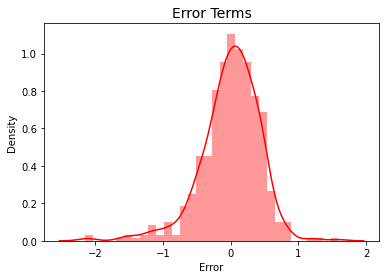

In [95]:
## residual analysis on the train set
lm1 = sm.OLS(y_train,X_train_sm).fit()
y_train_pred = lm1.predict(X_train_sm)
sns.distplot((y_train-y_train_pred), color='red')
plt.title('Error Terms',fontsize=14)
plt.xlabel('Error',fontsize=10)
plt.show()

### Making Prediction on Test Set


In [96]:
var = ['temp','humidity','windspeed','cnt']
df_test[var] = scaler.transform(df_test[var])
df_test.head()

,Year,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,Month_Sep,workingday_Weekend,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
196,0,1.055298,-0.277564,0.218552,0.760662,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
187,0,1.396245,0.196788,-0.420251,0.054486,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,0,-1.385176,-0.895117,-0.436331,-1.719706,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
31,0,-1.606751,1.473531,-1.797990,-1.660283,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
390,1,-0.801972,1.044057,-1.535631,-0.219813,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [97]:
## split the data for model evalution
X_test = df_test
y_test = df_test.pop('cnt')
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_test: (219, 27)
y_test: (219,)


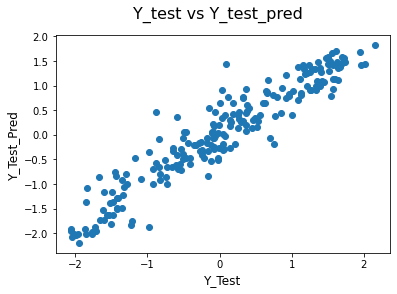

In [98]:
## Model Evalution
fig = plt.figure()
X_test_sm = sm.add_constant(X_test)
lm_test = sm.OLS(y_test, X_test_sm).fit()
y_test_pred = lm_test.predict(X_test_sm)
plt.scatter(y_test, y_test_pred)
fig.suptitle('Y_test vs Y_test_pred',fontsize=16)
plt.xlabel('Y_Test',fontsize=12)
plt.ylabel('Y_Test_Pred',fontsize=12)
plt.show()

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8957562212653584

- count = 1.06*Year + 0.4291*Temp - 0.4408*season_spring + 0.3259*season_winter - 0.2547*Month_Dec - 0.2240*Month_feb - 0.2983*Month_Jan - 0.2571*Month_July - 0.3610*Month_Nov + 0.2080*Month_Sep + 0.1446*weekday_Mon + 0.1156*weekday_Sun - 1.2729*weathersit_Light Snow - 0.3405*weathersit_Mist
- Overall we have Decent model

### <font color='Green'>Analysing the above model, the comapany should focus on the following features:</font> 

* Company should focus on expanding business during Spring and Winter, ideally during the month of November, December Jan, Feb, * March, since it seems that around this period cnt was low.
* Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
* Also, since there low booking during Sping and Winter which is when the wheater is between bad to severe, they could probably use this time to service the bikes without incuring any drop in business.
* Furthermore, since it is an service that is tangible in nature and used by multiple consumers, by keeping in mind market trends, the company should incorporate sanitation of the bikes which will boost customer confidence in the service.